# .. Correlación  entre Datos observados y datos corregidos por climatol

In [69]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [70]:
'''definir lista de estaciones'''
lista_estaciones = ['100','101','102','105','106','107','108','111','112','113','114','115',
                    '116','117','118','119','120','121','200','201','202','203','204','205'] #Completa
#lista_estaciones = ['100','101','102','106','111','116','120','200','204']

lista_var = ['pp','tmax','tmin']

'''definir cantidad de datos a mostrar d1=Fecha Inicio , d2=Fecha Fin'''
d1=180  
d2=280

'''funcion para leer datos y anexar informacion en la salida'''
def leer_datos(direccion):
    data = pd.read_csv(direccion)
    
    if (direccion.count('series')): data=data.rename(columns={'Date':'fecha'})
    data['fecha']=pd.to_datetime(data['fecha'])
    
    if (direccion.count('climatol')): origen='Corregidos'
    elif (direccion.count('obs')): origen='Observados'
    elif (direccion.count('nasa')): origen='NASA'
    elif (direccion.count('bc')): origen='chirps bc'
    else: origen='Chirps'
    
    if (direccion.count('pre') or direccion.count('pp')): variable='Precipitación'
    elif (direccion.count('tmax')): variable='Temperatura máxima'
    elif (direccion.count('tmin')): variable='Temperatura mínima'
    elif (direccion.count('tmed')): variable='Temperatura media'    
    else: variable='Humedad relativa media'
        
    return [data, origen, variable]
        

'''funcion para sacar la correlacion de dos df en base a una lista'''
def corr_columnas(lista_datos1, lista_datos2, lista):
    data1=lista_datos1[0]
    data2=lista_datos2[0]
    indice = ['spearman','pearson']
    data = pd.DataFrame(columns=lista, index = indice)
    for l in lista:
        for i in indice:
            data.loc[i,l]=data1[l].corr(data2[l], method=i)

    return data
        
        
def graficar_datos(lista_datos1, lista_datos2, lista):
    data1=lista_datos1[0]
    data2=lista_datos2[0]
    for l in lista:
        try:
            plt.figure(figsize=(12,6))
            plt.plot(data1.loc[d1:d2,'fecha'], data1.loc[d1:d2,l], 'g', label=lista_datos1[1]+' - '+l, linewidth=2)
            plt.plot(data2.loc[d1:d2,'fecha'], data2.loc[d1:d2,l], 'mo:', label=lista_datos2[1]+' - '+l, linewidth=2)
    #         plt.xticks(rotation = 45)
            plt.xticks(fontsize=22)
            plt.yticks(fontsize=22)
            plt.legend(fontsize=22,loc='upper left')
            plt.title("Correlación de "+lista_datos1[2], fontweight='bold',fontsize=28)
            plt.xlabel('Fecha', fontweight='bold',fontsize=22)
            plt.ylabel(lista_datos1[2], fontweight='bold',fontsize=22)
            plt.show()
        except:
            continue

In [71]:
'''Carga de Datos Mensuales  de todas las variables'''
obs = leer_datos('../datos/1.0.variables/obs_mensual_tmin.csv')
corr = leer_datos('../datos/2.1.estaciones_climatol/tmin-m_1981-2020_series.csv')

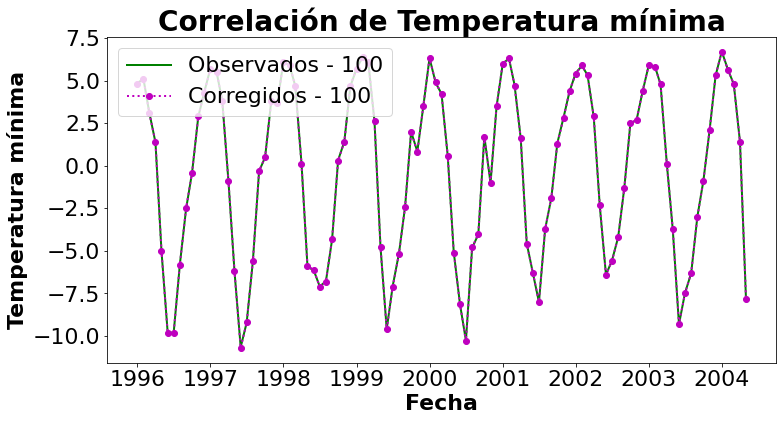

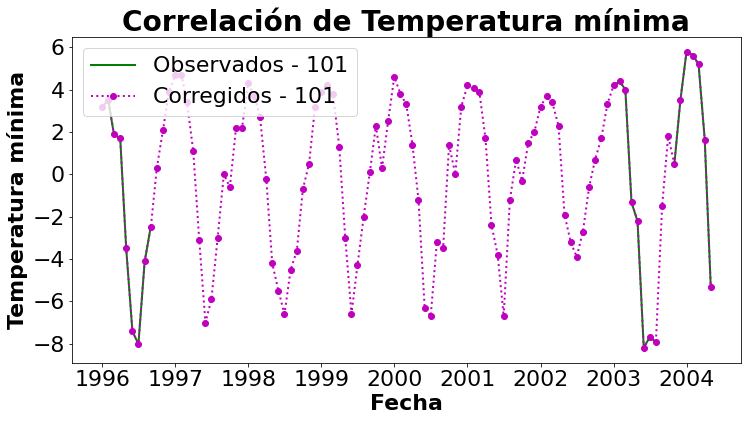

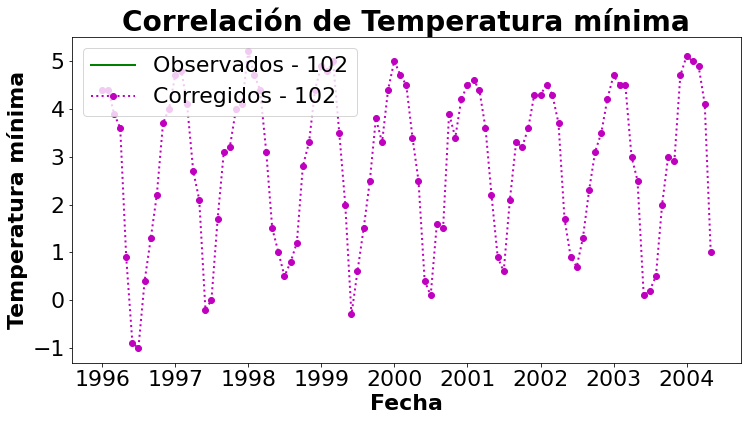

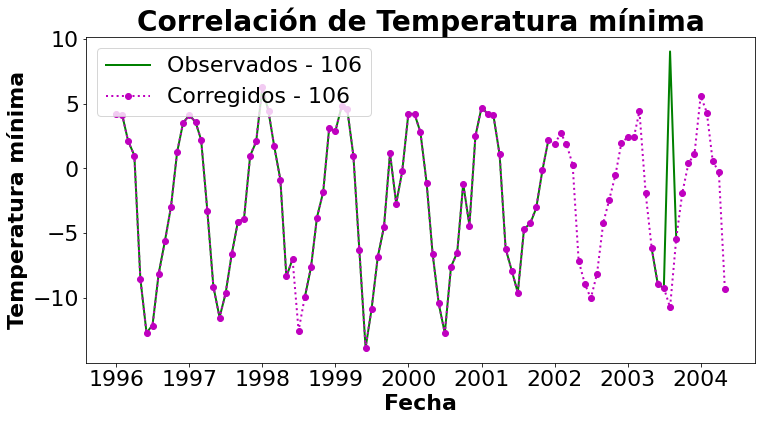

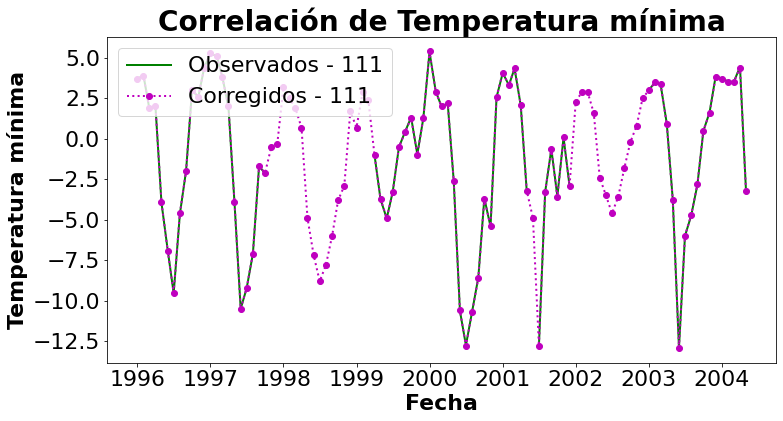

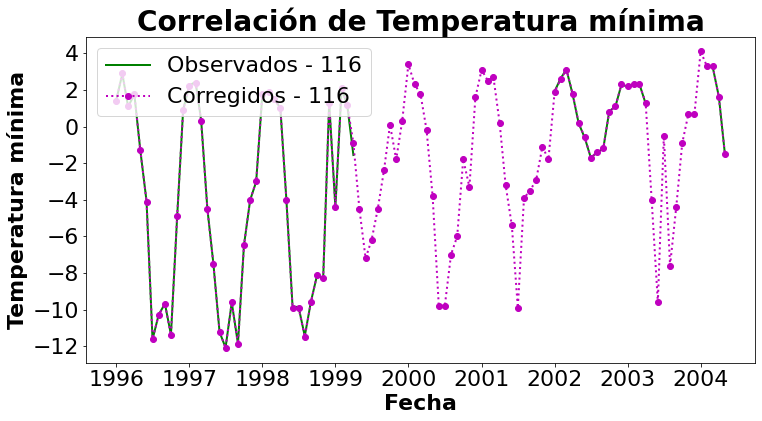

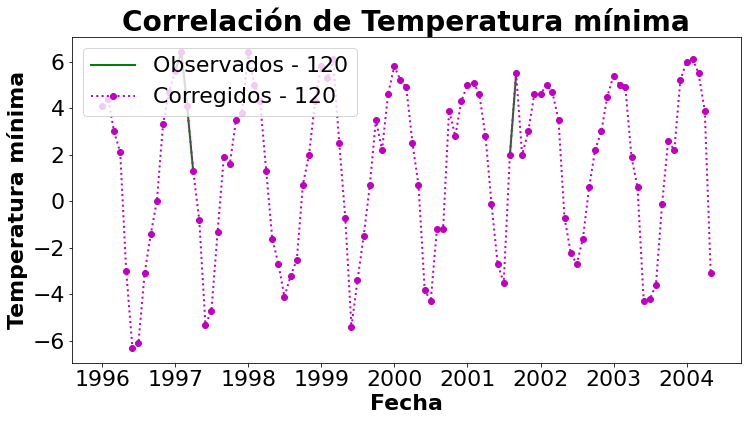

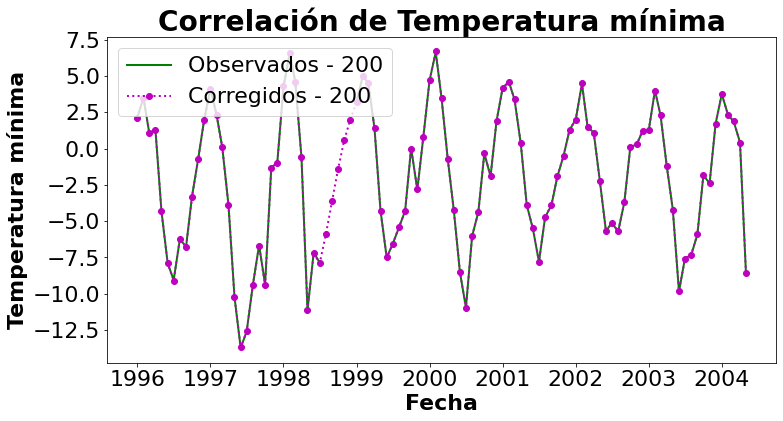

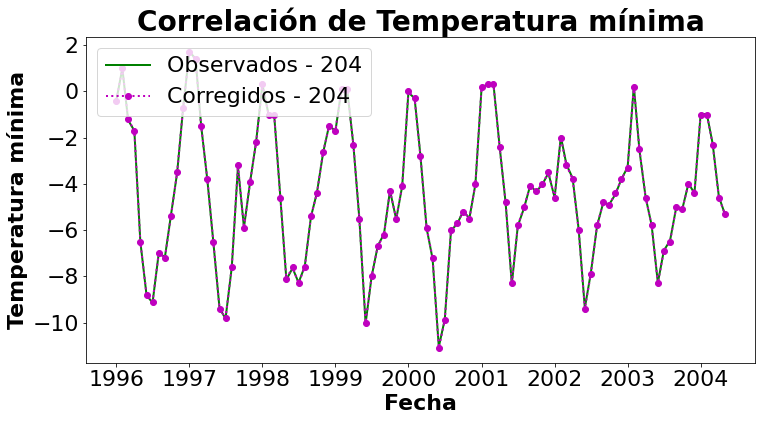

In [72]:
graficar_datos(obs, corr, lista_estaciones)

In [74]:
corr_columnas(obs, corr, lista_estaciones).T

,spearman,pearson
100,0.99856,0.998204
101,0.998654,0.999271
102,0.996561,0.992704
106,0.97156,0.963617
111,0.999926,0.999982
116,0.999883,0.999948
120,0.995701,0.997045
200,0.999948,0.999978
204,0.999939,0.999969
